In [2]:
# Answer for 7b)
import collections
from prompt_toolkit.layout.screen import defaultdict
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('/content/MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

# #randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train_random = images_train[inds]
labels_train_random = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test_random = images_test[inds]
labels_test_random = labels_test[inds]

# Using 10000 training data
images_train = images_train_random[:10000,:]
labels_train = labels_train_random[:10000,:]

# Using 1000 testing data
images_test= images_test_random[0:1000,:]
labels_test = labels_test_random[0:1000,:]

# Finding the distance between two points
def euclidean_distance(x,y):
  eu_dist = np.sqrt(np.sum(np.square(x - y)))
  return eu_dist

# Predicting the label using KNN algorithm
def predict_label(images_train,labels_train,images_test,k):
  pred_output=[]
  # Loop through test data
  for test in images_test:
    distances=[]
    # Loop through each training data
    for train in range(len(images_train)):
      dist = euclidean_distance(test, np.array(images_train[train,:]))
      distances.append(dist)
    # Getting the k nearest neighbours
    k_neighbours = np.array(distances).argsort()[:k]
    k_neighbours_label=labels_train[k_neighbours]
    # Predicting the label based on maximum count
    vals,counts = np.unique(k_neighbours_label, return_counts=True)
    index = np.argmax(counts)
    label=vals[index]
    # Keeping track of all output labels
    pred_output.append(label)
  return pred_output

# Gives accuracy for each label along with average accuracy
def kNN(images_train, labels_train, images_test, labels_test, k):
  predict = predict_label(images_train,labels_train,images_test,k)
  predicted=np.array(predict)
  actual = np.array(labels_test)
  correct_pred={}
  for i in range(0,10):
    correct_pred[i]=0
  # Keeping count of each digit correct occurence
  for i,j in zip(predicted,actual):
    if i==j:
      correct_pred[i]+=1 
  # Keeping count of actual digit occurence
  vals,counts= np.unique(actual, return_counts=True)
  # Calculating accuracy for each digit
  accuracy=[]
  for key,value in correct_pred.items():
    acc=(value/counts[key])*100
    accuracy.append(acc)
  average_accuracy = sum(accuracy)/10
  return accuracy , average_accuracy

# Checking KNN using value of k as 1
print("Count of training data : ", len(labels_train))
print("Count of testing data : ", len(labels_test))
[acc, av_acc]=kNN(images_train, labels_train, images_test, labels_test, 1)
print("Accuracy of each digit : ", acc)
print("Average accuracy : ", av_acc)

Count of training data :  10000
Count of testing data :  1000
Accuracy of each digit :  [99.02912621359224, 100.0, 89.8989898989899, 96.52173913043478, 95.40229885057471, 94.68085106382979, 96.51162790697676, 95.6896551724138, 92.78350515463917, 92.15686274509804]
Average accuracy :  95.26746561365493


Count of training data :  30
Count of testing data :  1000
Accuracy of each digit :  [72.81553398058253, 96.03960396039604, 59.59595959595959, 67.82608695652173, 63.2183908045977, 36.17021276595745, 45.348837209302324, 73.27586206896551, 30.927835051546392, 53.92156862745098]
Average accuracy :  59.91398910212801
Count of training data :  100
Count of testing data :  1000
Accuracy of each digit :  [83.49514563106796, 100.0, 69.6969696969697, 59.130434782608695, 72.41379310344827, 55.319148936170215, 87.20930232558139, 70.6896551724138, 54.63917525773196, 72.54901960784314]
Average accuracy :  72.51426445138351
Count of training data :  178
Count of testing data :  1000
Accuracy of each digit :  [98.05825242718447, 100.0, 69.6969696969697, 59.130434782608695, 74.71264367816092, 55.319148936170215, 91.86046511627907, 74.13793103448276, 65.97938144329896, 74.50980392156863]
Average accuracy :  76.34050310367235
Count of training data :  316
Count of testing data :  1000
Accuracy of each d

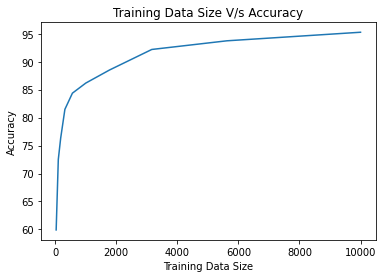

In [3]:
# Answer for 7c)
# Using 10000 training data
log_space_size= np.round(np.logspace(2,4,num=9))
data_size_float = np.append(30,log_space_size)
data_size = data_size_float.astype(int)
av_acc_array = []
for i in data_size:
  images_train = images_train_random[:i,:]
  labels_train = labels_train_random[:i,:]

  # Using 1000 testing data
  images_test= images_test_random[0:1000,:]
  labels_test = labels_test_random[0:1000,:]

  print("Count of training data : ", len(labels_train))
  print("Count of testing data : ", len(labels_test))
  [acc, av_acc]=kNN(images_train, labels_train, images_test, labels_test, 1)
  av_acc_array.append(av_acc)
  print("Accuracy of each digit : ", acc)
  print("Average accuracy : ", av_acc)

x = data_size
y = av_acc_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Training Data Size') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Training Data Size V/s Accuracy')     
# function to show the plot 
plt.show()

Value of k :  1
Count of testing data :  1000
Count of training data :  30
Accuracy of each digit :  [72.81553398058253, 96.03960396039604, 59.59595959595959, 67.82608695652173, 63.2183908045977, 36.17021276595745, 45.348837209302324, 73.27586206896551, 30.927835051546392, 53.92156862745098]
Average accuracy :  59.91398910212801
Count of training data :  100
Accuracy of each digit :  [83.49514563106796, 100.0, 69.6969696969697, 59.130434782608695, 72.41379310344827, 55.319148936170215, 87.20930232558139, 70.6896551724138, 54.63917525773196, 72.54901960784314]
Average accuracy :  72.51426445138351
Count of training data :  178
Accuracy of each digit :  [98.05825242718447, 100.0, 69.6969696969697, 59.130434782608695, 74.71264367816092, 55.319148936170215, 91.86046511627907, 74.13793103448276, 65.97938144329896, 74.50980392156863]
Average accuracy :  76.34050310367235
Count of training data :  316
Accuracy of each digit :  [100.0, 100.0, 77.77777777777779, 75.65217391304347, 78.1609195402

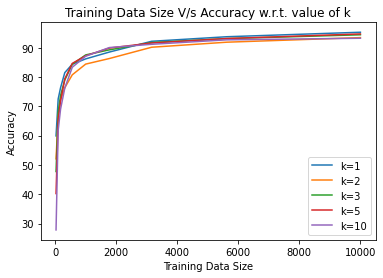

In [4]:
# Answer for 7d)
# Using 10000 training data
log_space_size= np.round(np.logspace(2,4,num=9))
data_size_float = np.append(30,log_space_size)
data_size = data_size_float.astype(int)
k_val_list = [1, 2, 3, 5, 10]
av_acc_array = []
for k in k_val_list:
  print("Value of k : ", k)

  # Using 1000 testing data
  images_test= images_test_random[0:1000,:]
  labels_test = labels_test_random[0:1000,:]
  print("Count of testing data : ", len(labels_test))

  # Average accuracy for different data size for a specific value of k 
  av_acc_k = []
  for i in data_size:
    images_train = images_train_random[:i,:]
    labels_train = labels_train_random[:i,:]
    print("Count of training data : ", len(labels_train))

    [acc, av_acc]=kNN(images_train, labels_train, images_test, labels_test, k)
    av_acc_k.append(av_acc)
    
    print("Accuracy of each digit : ", acc)
    print("Average accuracy : ", av_acc)
  av_acc_array.append(av_acc_k)

x = data_size
label_index=0
for y in av_acc_array:
  plt.plot(x,y,label='k=%i'%k_val_list[label_index]) 
  label_index+=1
# naming the x axis 
plt.xlabel('Training Data Size') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Training Data Size V/s Accuracy w.r.t. value of k')
# Position of graph information
plt.legend(loc='lower right')     
# function to show the plot 
plt.show()

Count of training data :  1000
Count of validation data :  1000
Average accuracies for different k values :  [87.02867754080236, 84.84587076531113, 86.75834514559196, 86.92622398797911, 86.48350697551723]


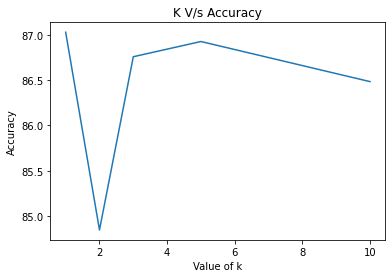

In [5]:
# Answer for 7e)-Part1 Finding optimal k
# Using 1000 training data/ 1000 validation data
images_train_random_all = images_train_random[:2000,:]
labels_train_random_all = labels_train_random[:2000,:]

images_train = images_train_random_all[:1000,:]
labels_train = labels_train_random_all[:1000,:]

images_validation = images_train_random_all[1000:2000,:]
labels_validation = labels_train_random_all[1000:2000,:]

k_val_list = [1, 2, 3, 5, 10]
av_acc_array = []

print("Count of training data : ", len(labels_train))
print("Count of validation data : ", len(labels_validation))
for k in k_val_list:
  [acc, av_acc]=kNN(images_train, labels_train, images_validation, labels_validation, k)
  av_acc_array.append(av_acc)

print("Average accuracies for different k values : ", av_acc_array)

x = k_val_list
y = av_acc_array 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('Value of k') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('K V/s Accuracy')     
# function to show the plot 
plt.show()

In [6]:
# Answer for 7e)-Part2 Using the optimal k : 1 in my case
images_train = images_train_random_all[:2000,:]
labels_train = labels_train_random_all[:2000,:]

inds = np.random.permutation(images_test.shape[0])
images_test_random = images_test[inds]
labels_test_random = labels_test[inds]

# Using 1000 testing data
images_test= images_test_random[0:1000,:]
labels_test = labels_test_random[0:1000,:]

[acc, av_acc]=kNN(images_train, labels_train, images_test, labels_test, 1)
print(acc, av_acc)

[99.02912621359224, 100.0, 85.85858585858585, 82.6086956521739, 88.50574712643679, 85.1063829787234, 94.18604651162791, 90.51724137931035, 82.4742268041237, 85.29411764705883] 89.35801701716329
